# Linear equations

In [51]:
import pandas as pd
import numpy as np

import scipy as sp
import scipy.linalg

from scipy.special import factorial
from algorithms import *
from plots import *
from problems import *

import numpy as np
from numpy.linalg import norm, cond, solve
import time
import matplotlib.pyplot as plt


# how come using autformatting?
np.set_printoptions(precision=4)
# also for Pandas

## Special cases

We can start with some special cases to develop the basic building blocks for more complicated material

In [21]:
A = np.identity(3)
b = np.random.normal(size=3)

x = forward_substitution(A, b)
x = backward_substitution(A, b)
x, b

(array([-0.1252,  0.7208,  0.3646]), array([-0.1252,  0.7208,  0.3646]))

## L-U Factorization







Adding to this the two building blocks we developed earlier `forward_substitution` and `backward_substitution`, we can now write a quite generic function to solve systems of linear equations.

In [22]:
A = np.array([[3, 1], [1, 2]])
b = np.array([9, 8])

x = solve(A, b)
# Test that correct.
np.allclose(np.dot(A, x), b)

True

Building your own numerical routines is usually the only way to really understand the algorithms and learn about all the potential pitfalls. However, the default should be to rely on battle-tested production code. For linear algebra there are numerous well established libraries available.

How does solving a system of linear equations compare to other alternative?

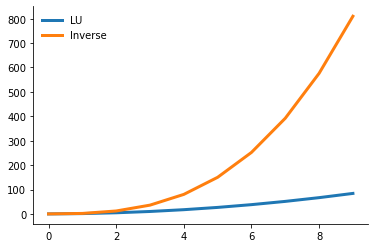

In [23]:
plot_operation_count()

The right setup for your numerical needs depends on your particular problem. For example, this trade-off looks very different if you have to solve numerous linear equations that only differ in $b$ but not $A$. 

In [24]:
tic = lambda: time.time()
toc = lambda t: time.time() - t

print(
    "{:^5} {:^5}   {:^11} {:^11} \n{}".format(
        "m", "n", "np.solve(A,b)", "dot(inv(A), b)", "-" * 40
    )
)

for m in [1, 100]:
    for n in [50, 500]:
        A = np.random.rand(n, n)
        b = np.random.rand(n, 1)

        tt = tic()
        for j in range(m):
            x = np.linalg.solve(A, b)

        f1 = 100 * toc(tt)

        tt = tic()
        Ainv = np.linalg.inv(A)
        for j in range(m):
            x = np.dot(Ainv, b)

        f2 = 100 * toc(tt)
        print(" {:3}   {:3} {:11.2f} {:11.2f}".format(m, n, f1, f2))

  m     n     np.solve(A,b) dot(inv(A), b) 
----------------------------------------
   1    50        0.02        0.05
   1   500        0.32        0.70
 100    50        0.46        0.09
 100   500       14.63        0.54


## Gaussian elimination

code in file, give reference and then move on.


## Rounding error

##  ill conditioned

In [25]:
grid = [5, 10, 15]
cond = np.tile(np.nan, len(grid))
err = np.tile(np.nan, len(grid))
for i, n in enumerate(grid):
    A, b, x_true = get_ill_problem_1(n)
    x_solve = np.linalg.solve(A, b)
    cond[i] = np.linalg.cond(A)
    err[i] = np.linalg.norm(x_solve - x_true, 1)

In [26]:
df = pd.DataFrame(columns=["Condition", "Error", "Dimension"])

df["Dimension"] = grid
df["Condition"] = err
df["Error"] = cond

In [27]:
df

,Condition,Error,Dimension
0,5.759837e-13,2.616969e+04,5
1,1.611891e-06,2.106258e+12,10
2,3.532057e+02,2.582411e+21,15


In [28]:
grid = np.linspace(0.9, 1.1)
cond, err = list(), list()
for p in grid:
    A, b, x_true = get_ill_problem_2(p)
    x_solve = np.linalg.solve(A, b)

    cond.append(np.linalg.cond(A))
    err.append(np.linalg.norm(x_solve - x_true, 1))

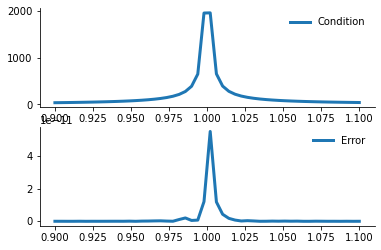

In [29]:
plot_ill_problem_2(cond, err, grid)

## Iterative methods


In [54]:
A, b, x_true = get_inverse_demand_problem()

### Gaus Jacobi

In [55]:
x_solve, conv_gj = gauss_jacobi(A, b)

In [56]:
x_solve, x_true

(array([6., 4.]), array([6., 4.]))

### Gauss Seidel

In [57]:
x_solve, conv_gs = gauss_seidel(A, b)

We can now compare the two methods.

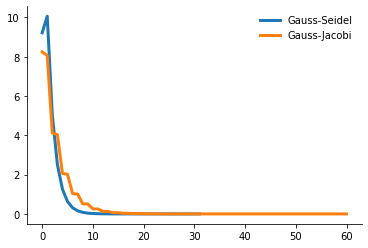

In [58]:
plot_iterative_convergence(conv_gs, conv_gj)

In [81]:
n = 2
if True:

    x = np.random.uniform(size=n)

    A = np.random.normal(size=(n, n))

    
    
    b = np.matmul(A, x)
    
    

In [85]:
np.diag(np.diag(A))

array([[0.0635, 0.    ],
       [0.    , 0.9102]])

In [88]:
import pytest
import numpy as np

from algorithms import forward_substitution
from problems import get_random_problem

A, b, x_true = get_random_problem(is_diag=True)

x_solve = forward_substitution(A, b)
np.testing.assert_almost_equal(x_solve, x_true)

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 1.4113
Max relative difference: 2.3826
 x: array([-0.818953, -0.38811 ])
 y: array([0.5923386, 0.4512974])

In [103]:
A, b, x_true = get_random_problem(is_diag=True)


x_solve = forward_substitution(A, b)

In [104]:
np.testing.assert_almost_equal(x_solve, x_true)

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 1.2053
Max relative difference: 2.1616
 x: array([-0.0062178, -0.6477394])
 y: array([0.0149343, 0.5576082])

In [105]:
A

array([[-0.4163,  0.    ],
       [ 0.    , -1.1616]])

In [106]:
b

array([-0.0062, -0.6477])

In [107]:
x_true

array([0.0149, 0.5576])

In [109]:
b[0] / A[0, 0]

0.01493431402137757

In [110]:
x_solve

array([-0.0062, -0.6477])

In [111]:
from algorithms import forward_substitution_new

In [112]:
forward_substitution_new(A, b)

array([0.0149, 0.5576])